# AL 5-8~5-9

### 1) 문제 정의

최근접 쌍의 거리 찾기

### 2) 알고리즘 설명

먼저 P는 이미 x의 오름차순으로 정렬되어 있다고 가정한다. 만약 점이 3개 이하이면 억지 기법으로 바로 계산한다


### 3) 손으로 푼 예제

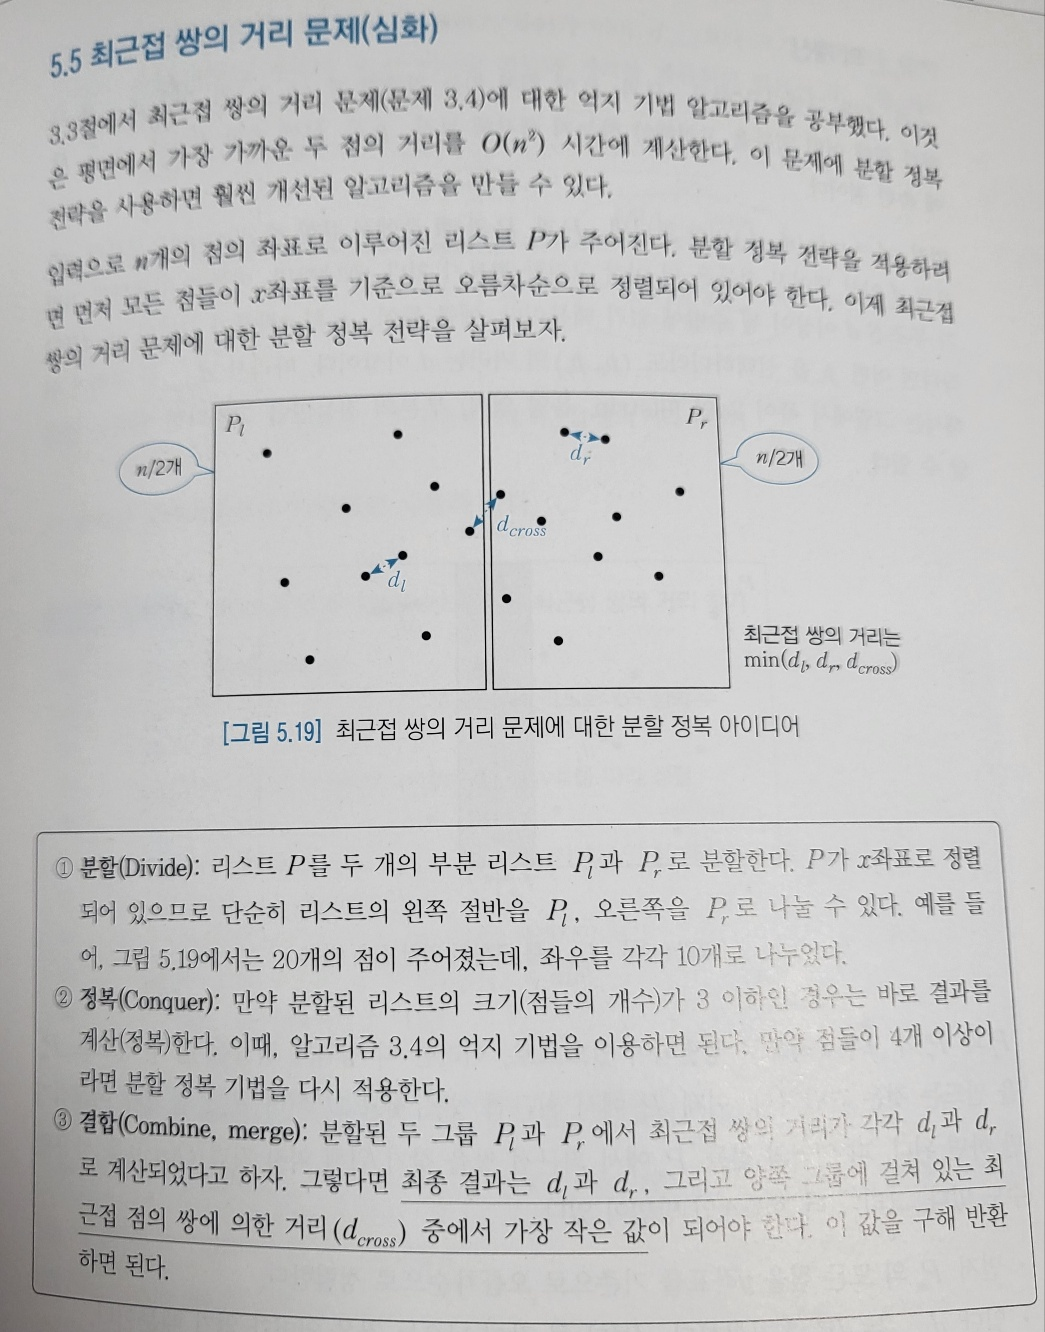

### 4) 코드 개요

알고리즘 5.8  
2행: 리스트내의 점의 수  
4행: y축을 따라 정렬  
6행: y가 최소인 점부터 순서대로  
14행: d_min 반환  
알고리즘 5.9  
2행: 점이 3개 이하이면, brute force로 바로 계산  
3행: 억지 기법 알고리즘(알고리즘 3.4)  
5행: 중앙점을 찾음. P는 현재 x로 정렬되어 있음  
6행: 중앙점의 x좌표  
8행: Pl에서 dl 계산  
9행: Pr에서 dr 계산  
10행: d는 둘 중에서 더 짧은 거리  
12행: 중앙에서 x좌표가 d이내인 점들의 집합Pm을 만듦  
13행: Pm도 x에 데헤 정렬되어 있음  
17행: Pm내에서 d보다 작은 최근접쌍 거리 찾기

### 5) 알고리즘 코드

In [ ]:
def strip_closest(P,d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point : point[1])

    for i in range(n):
        j = i + 1
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij=distance(P[i],P[j])
            if dij < d_min:
                d_min=dij
            j += 1
    return d_min


    
def closest_pair_dist(P,n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl,dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0]-mid_x)<d:
            Pm.append(P[i])

    ds = strip_closest(Pm,d)
    return ds

### 6) 수행결과

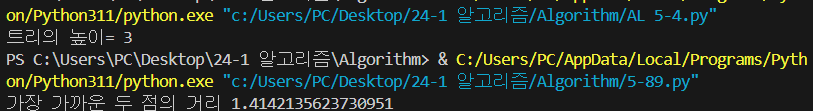

### 7) 테스트 코드

In [ ]:
import math
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def closest_pair(p):
    n=len(p)
    mindist=float("inf")
    for i in range(n-1):
        for j in range(i+1,n):
            dist = distance(p[i],p[j])
            if dist < mindist:
                mindist = dist
    return mindist



def strip_closest(P,d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point : point[1])

    for i in range(n):
        j = i + 1
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij=distance(P[i],P[j])
            if dij < d_min:
                d_min=dij
            j += 1
    return d_min


    
def closest_pair_dist(P,n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl,dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0]-mid_x)<d:
            Pm.append(P[i])

    ds = strip_closest(Pm,d)
    return ds

p=[(2,3),(12,30),(40,50),(5,1),(12,10),(3,4)]
p.sort(key = lambda point: point[0])
print("가장 가까운 두 점의 거리",closest_pair_dist(p,len(p)))

### 8) 복잡도 분석

5.8 복잡도 = O(n^2), 5.9 복잡도 = O(n(log2n)^2)